In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import pandas as pd
import numpy as np

sns.set(style = 'darkgrid')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from ipywidgets import interactive
import ipywidgets as widgets

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

import io
import base64
from IPython.display import HTML

# Data Visualization Techniques

Essential packages:

* matplotlib
* seaborn

There are many (very many) methods to visualize data. Let us organize them by (1) how many features we are visualizing and (2) what are the features (categorical vs. continuous). The code below based in part on:
* https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic
* https://elitedatascience.com/python-seaborn-tutorial
* https://stackoverflow.com


## One-dimensional data

We can use the list of Titanic passengers as an example:

In [4]:
df = pd.read_csv('./data/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Categorical data

We can visualize how many male and female passengers were on board. This illustrates that there were many more male passengers.

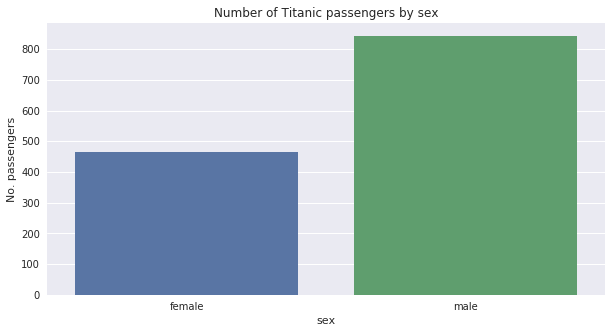

In [109]:
plt.figure(figsize = (10,5)) # the image will be 10"x5"
ax = plt.subplot(111) # there will be 1 row, 1 column, and this is the 1st subplot
sns.countplot(x = 'sex' # the field to put at x label
              , data = df # the dataframe to work with
              , ax = ax) # the subplot to use
ax.set_title('Number of Titanic passengers by sex') # add title
ax.set_ylabel('No. passengers') # add/change ylabel
plt.show() # output

There were three ports where the passengers embarked: Southampton, Cherbourg, and Queenston. How many passengers embarked at each port?

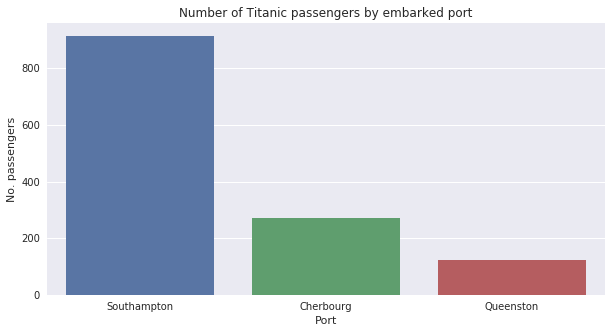

In [110]:
# use countplot to show how many passengers embarked in each port:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.countplot(x = 'embarked'
              , data = df
              , ax = ax)
ax.set_title('Number of Titanic passengers by embarked port')
ax.set_ylabel('No. passengers')
ax.set_xlabel('Port')
ax.set_xticklabels(np.asarray(['Southampton','Cherbourg','Queenston'])) # replace s, c, and q with meaningful labels
plt.show()

A pie-chart is a common method to visualize one-dimensional categorical data:

In [111]:
# Prepare the data first
df.groupby('embarked').count()['survived']

embarked
C    270
Q    123
S    914
Name: survived, dtype: int64

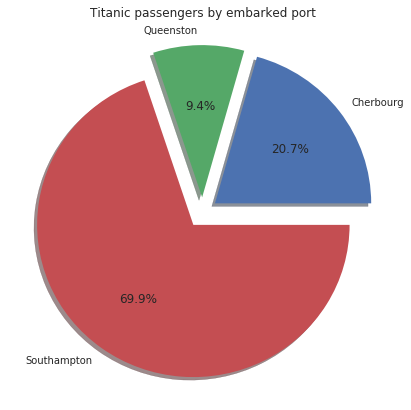

In [112]:
# Draw a pie chart
plt.figure(figsize = (7,7))
ax = plt.subplot(111)
df.groupby('embarked').count()['survived'].plot.pie( # draw the piechart from DataFrame
    ax = ax
    ,shadow = True # make it look like 3D
    ,explode = [0.1,0.1,0.1] # how much each section sticks out
    ,labels = ['Cherbourg','Queenston','Southampton'] # fix the labels
    ,autopct = '%2.1f%%' # add percentages
    ,x = 'embarked') # data field to visualize
ax.set_title('Titanic passengers by embarked port')
ax.set_ylabel('')
plt.show()

### One-dimensional continuous data

In case of continuous data, we can start by visualizing its distribution, for instance the distribution of passenger age or ticket price:

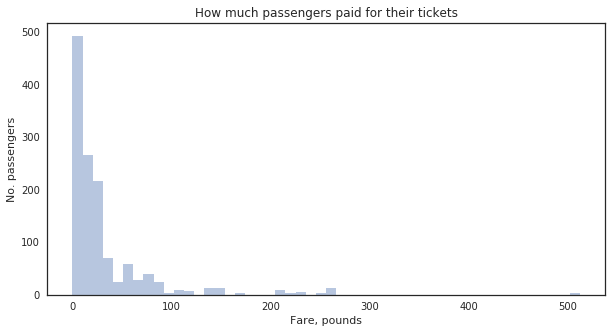

In [303]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.distplot(df['fare'].dropna(), # ticket price with NaN's removed
             kde = False, # exclude KDE line, experiment with it, also try kdeplot(...) here
             bins = 50, # how many bins, experiment with it
             ax = ax) 
ax.set_title('How much passengers paid for their tickets')
ax.set_xlabel('Fare, pounds')
ax.set_ylabel('No. passengers')
plt.show()

Boxplot is a way to see the distribution of the data and to detect outliers:

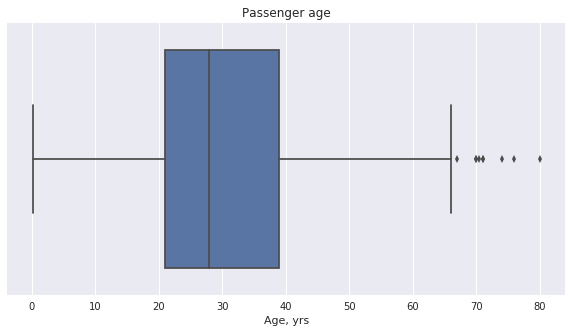

In [114]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.boxplot(df['age'].dropna(), # passenger age
             ax = ax) 
ax.set_title('Passenger age')
ax.set_xlabel('Age, yrs')
plt.show()

### One-dimensional time series

The classic approach to visualize time series is a regular plot. Let us visualize AMZN stock:

In [5]:
df2 = pd.read_csv('./data/AMZN.csv').set_index('Date')
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


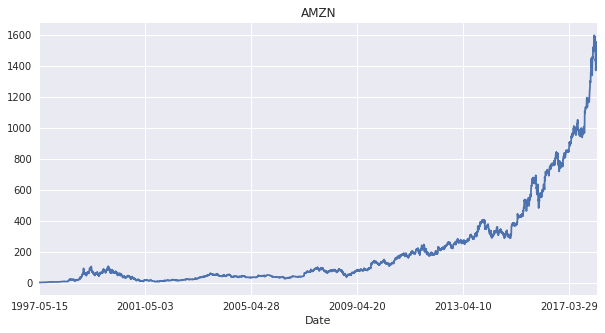

In [116]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
df2['Close'].plot(ax = ax)
ax.set_title('AMZN')
ax.set_xlabel('Date')
plt.show()

## Two-dimensional data

### Two categorical features

The major purpose here is to visualize the dependency (or lack thereof) between two features. Suppose that we want to investigate the dependency between sex and survived fields in Titanic dataset: 

In [117]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


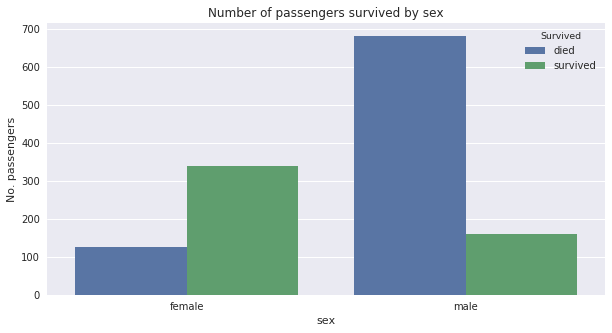

In [118]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.countplot(x = 'sex', # the first dimension
              hue = 'survived', # the second dimension
              data = df)
ax.set_title('Number of passengers survived by sex')
ax.set_ylabel('No. passengers')

# fix the legend
legend = ax.get_legend()
legend.set_title('Survived')
legend.texts[0].set_text('died')
legend.texts[1].set_text('survived')
plt.show()

If needed, the features can swap:

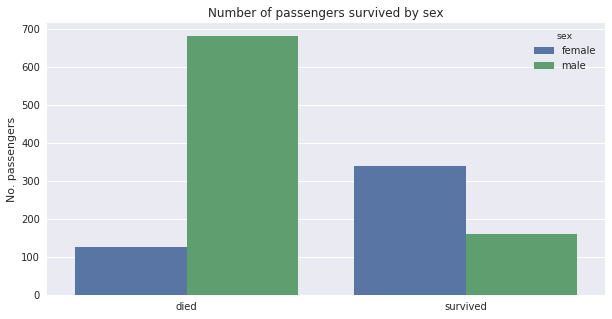

In [119]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.countplot(x = 'survived', # the first dimension
              hue = 'sex', # the second dimension
              data = df)
ax.set_title('Number of passengers survived by sex')
ax.set_ylabel('No. passengers')
ax.set_xticklabels(['died','survived'])
ax.set_xlabel('')
plt.show()

Survived by passenger class, but rotated horizontally:

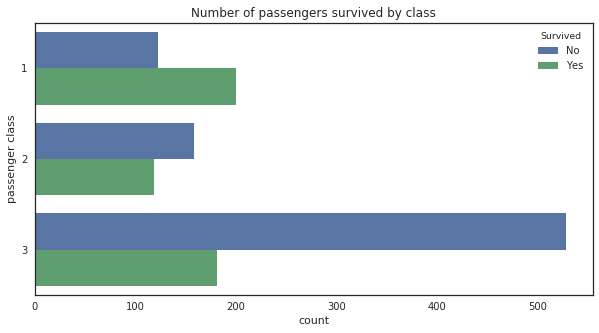

In [129]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.countplot(y = 'pclass' # first feature
              , hue = 'survived' # second feature
              , data = df)
ax.set_title('Number of passengers survived by class')
ax.set_ylabel('passenger class')

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")

plt.show()
sns.set(style='white')

How about how many passengers survived based on their embarked port?

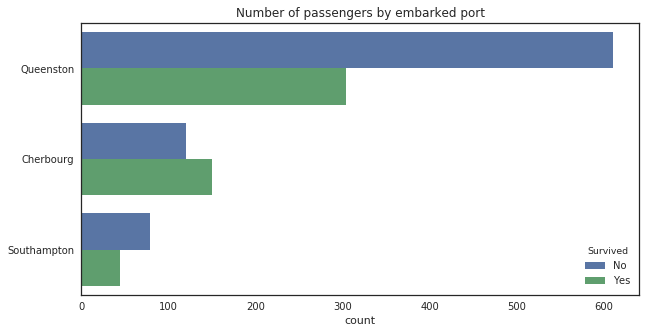

In [304]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.countplot(y = 'embarked'
              , hue = 'survived'
              , data = df)
ax.set_title('Number of passengers by embarked port')
ax.set_yticklabels(['Queenston','Cherbourg','Southampton'])
ax.set_ylabel('')

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")

plt.show()

In [ ]:
# check out pclass vs. embarked, and pclass vs. sex

### Multiple categories

Parch feature in Titanic dataset means parents and children travelling with the passenger. It can take values from 0 to 5 and so perhaps the countplot will not be too informative. Let us visualize it with a factorplot:

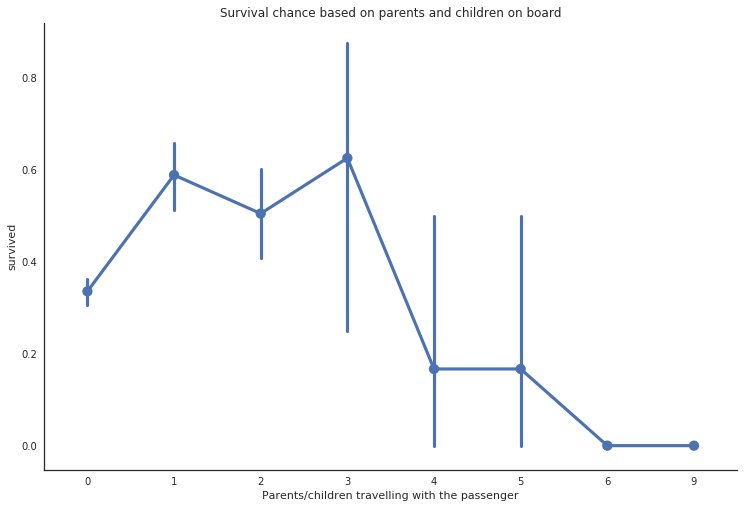

In [263]:
g = sns.factorplot(
    x = "parch"
    , y = "survived"
    , data = df
    ,kind = "point"
    ,size = 7 # the height
    ,aspect = 1.5 # width to height aspect ratio
)
plt.title('Survival chance based on parents and children on board')
plt.xlabel('Parents/children travelling with the passenger')
plt.show()

### Categorical vs. continuous features

What if one field is continuous? Let us visualize the dependency between survived and age. This can be done by overlaying two distribution plots:

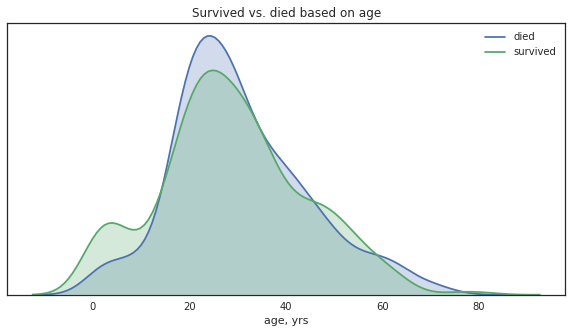

In [138]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.kdeplot(df[df['survived'] == 0]['age'].dropna(), label = 'died', shade = True)
sns.kdeplot(df[df['survived'] == 1]['age'].dropna(), label = 'survived', shade = True)
ax.set_title('Survived vs. died based on age')
ax.set_yticklabels([])
ax.set_xlabel('age, yrs')
plt.show()

In [41]:
# check out survived vs. fare

### Two continuous features

This is typically done via scatterplots:

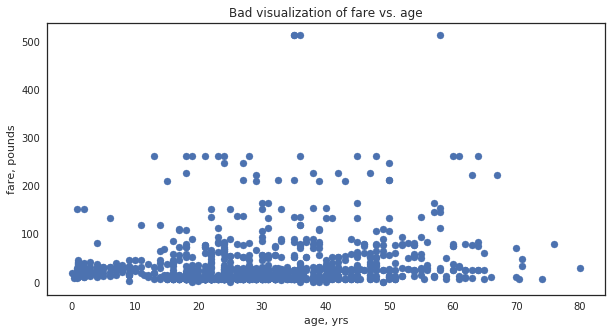

In [305]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
ax.scatter(
    df['age'] # x axis
    ,df['fare']) # y axis
ax.set_xlabel('age, yrs')
ax.set_ylabel('fare, pounds')
ax.set_title('Bad visualization of fare vs. age')
plt.show()

Another option is to visualize the bivariate distribution of the factors with kdeplot: 

/opt/anaconda3/envs/jh/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/anaconda3/envs/jh/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/jh/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/jh/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


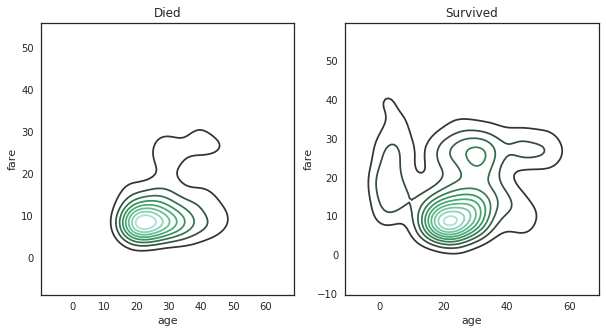

In [279]:
df_age_fare = df[['survived','age','fare']].dropna() # drop NaN's
df_age_fare = df_age_fare[(df_age_fare.fare < 50) & (df_age_fare.age < 60)]

plt.figure(figsize = (10,5))
ax = plt.subplot(121)
sns.kdeplot(
    df_age_fare[df['survived'] == 0]['age']
    ,df_age_fare[df['survived'] == 0]['fare']
    ,label = 'died'
    ,ax = ax
)
ax.set_title('Died')
ax = plt.subplot(122)
sns.kdeplot(
    df_age_fare[df['survived'] == 1]['age']
    ,df_age_fare[df['survived'] == 1]['fare']
    ,label = 'survived'
    ,ax = ax
)
ax.set_title('Survived')
plt.show()

Below is another option to do the same visualization, but using FacetGrid:

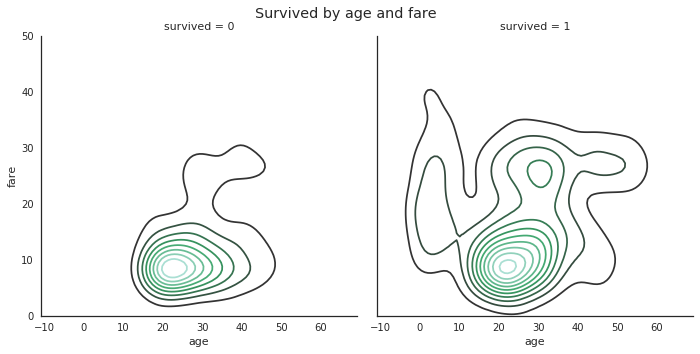

In [278]:
g = sns.FacetGrid(df_age_fare
                  ,size=5
                  , col="survived" # how to organize columns
                  , margin_titles=True
                  #, hue = "survived" # use survived for hue
                 )

g = g.map(
    sns.kdeplot # use histogram at each subplot
    , "age" # show age at x
    , "fare" # show fare at y
)
g.fig.suptitle("Survived by age and fare")
plt.subplots_adjust(top=0.90)
plt.ylim(0,50)
plt.show()

#### Advertising dataset
Let us visualize two continuous features from Advertising dataset:

In [6]:
df_adv = pd.read_csv('./data/Advertising.csv').drop('Unnamed: 0', axis = 1)
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


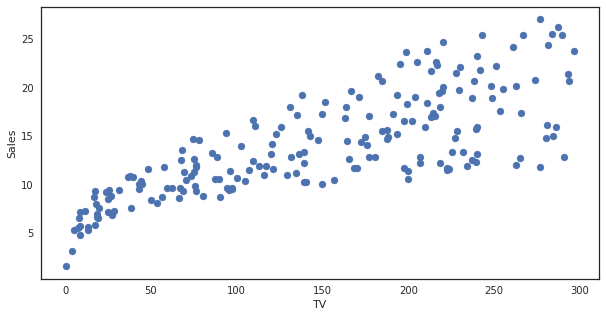

In [282]:
plt.figure(figsize = [10,5])
ax = plt.subplot(111)
ax.scatter(df_adv['TV'],df_adv['Sales'])
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
plt.show()

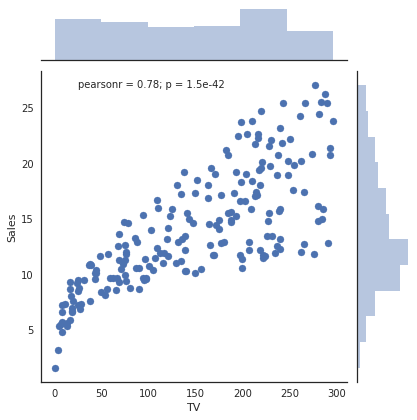

In [296]:
sns.jointplot(data = df_adv
              ,x = 'TV'
              ,y = 'Sales'
             )

## Three-dimensional data

This is more challenging, because our visualizations are on a plane, i.e. 2D. However, we can use several techniques like coloring, styles, etc.

Let us first explore the dependency between embarked, age and sex:

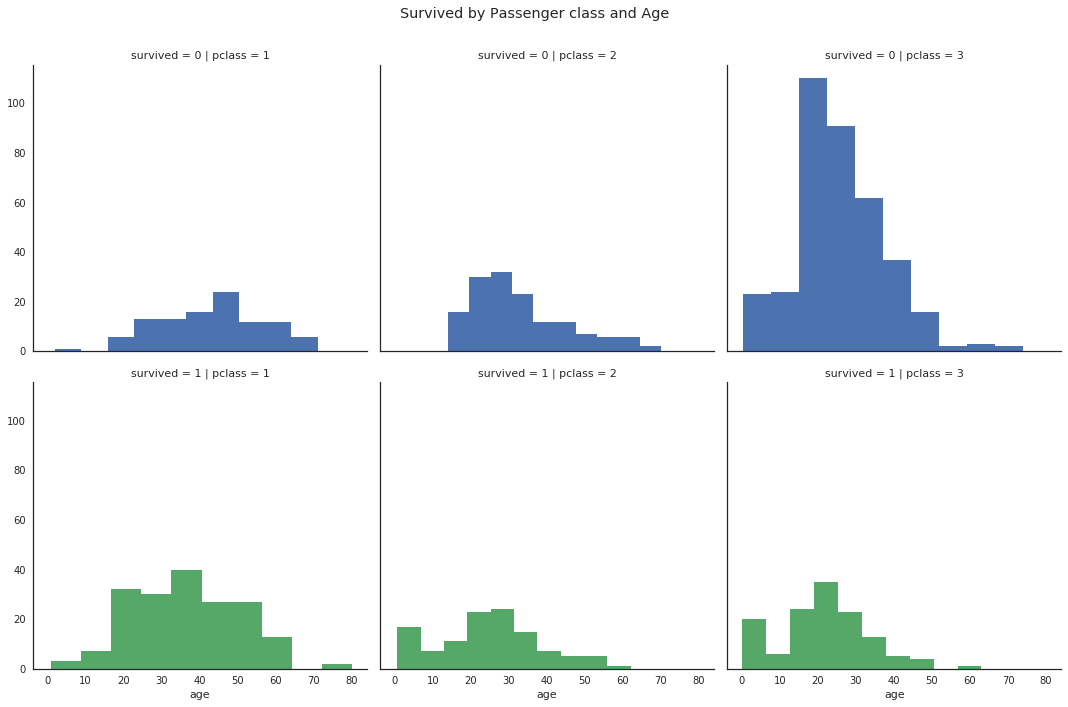

In [210]:
g = sns.FacetGrid(df
                  ,size=5
                  , col="pclass" # how to organize columns
                  , row="survived" # how to organize rows
                  #, margin_titles=True
                  , hue = "survived" # use survived for hue
                 )
g = g.map(
    plt.hist # use histogram at each subplot
    , "age" # show age
    #, bins = 30
)
g.fig.suptitle("Survived by Passenger class and Age")
plt.subplots_adjust(top=0.90)
plt.show()

How about passenger class, port and sex?

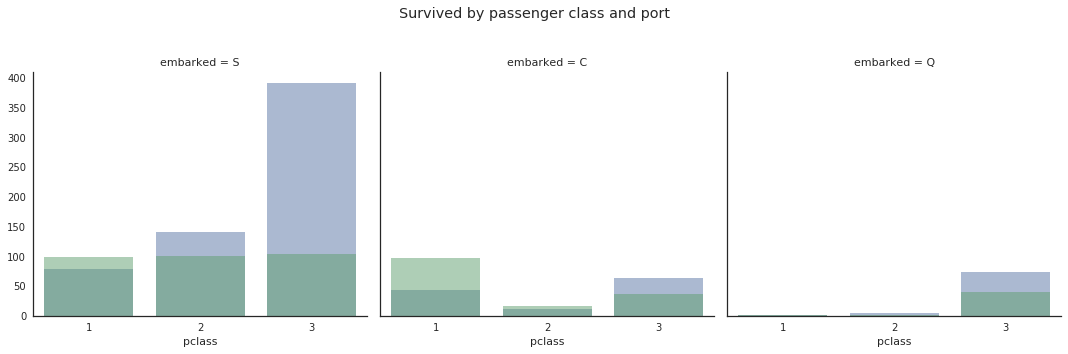

In [211]:
g = sns.FacetGrid(df
                  ,size=5
                  , col="embarked" # how to organize columns
                  #, row="survived" # how to organize rows
                  #, margin_titles=True
                  , hue = "survived" # use survived for hue
                 )
g = g.map(
    sns.countplot # 
    , "pclass" # 
    , alpha = 0.5
    #, hue = 'survived'
)
g.fig.suptitle("Survived by passenger class and port")
plt.subplots_adjust(top=0.80)
plt.show()

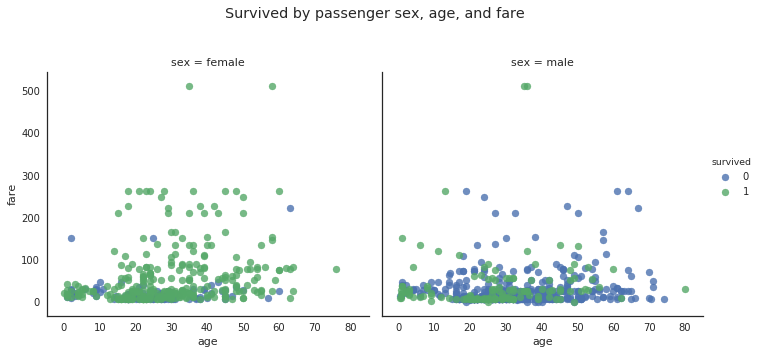

In [217]:
g = sns.FacetGrid(df
                  ,size=5
                  , col="sex" # how to organize columns
                  #, row="survived" # how to organize rows
                  #, margin_titles=True
                  , hue = "survived" # use survived for hue
                 )
g = g.map(
    plt.scatter # 
    , "age" #
    , "fare"
    , alpha = 0.8
    #, hue = 'survived'
).add_legend()

g.fig.suptitle("Survived by passenger sex, age, and fare")
plt.subplots_adjust(top=0.80)
plt.show()

### Multiple continuous features

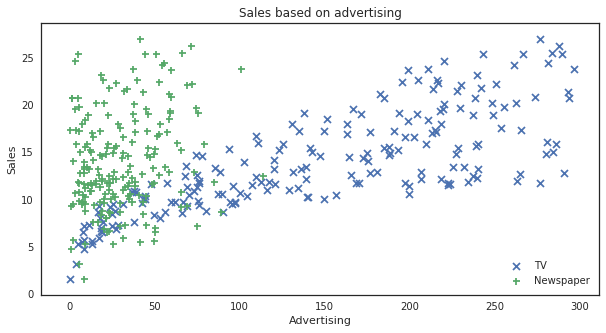

In [237]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
ax.scatter(x = df_adv['TV'] # feature one
           , y = df_adv['Sales']
           , marker = 'x'
           , label = 'TV')
#ax.scatter(x = df_adv['Radio'], y = df_adv['Sales'], label = 'Radio') # this will make it messy
ax.scatter(x = df_adv['Newspaper'] # feature two
           , y = df_adv['Sales']
           , label = 'Newspaper'
          , marker = '+')
ax.set_xlabel('Advertising')
ax.set_ylabel('Sales')
ax.set_title('Sales based on advertising')
plt.legend()
plt.show()

## Multiple continuous features

One option here is to visualize their correlations:

In [297]:
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [299]:
corr = df_adv.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


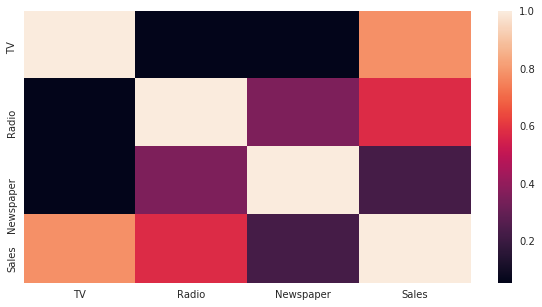

In [302]:
plt.figure(figsize = (10,5))
ax = plt.subplot(111)
sns.heatmap(
    df_adv.corr(), 
    ax = ax)
plt.show()

## Multidimensional data

The typical course of action here is the application of the Principle Component Analysis (PCA) to reduce the dimensionality and then visualize the data with t-Distributed Stochastic Neighborhood embedding algorithm (t-SNE). 

Consider MNIST dataset:

In [2]:
mnist = fetch_mldata('MNIST original')
mnist.data.shape

/opt/anaconda3/envs/jh/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/envs/jh/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

The data contains 70K images of 28x28 pixels, or 784 dimensions. We can first apply PCA to reduce dimensionality. 153 components are sufficient to explain 95% of variance in the data. Since the algorithms (especially t-SNE) may take a long time to complete, let us select a subset: 

In [44]:
num_rows = 10000
idx = np.random.choice(mnist.data.shape[0], num_rows, replace=False)
X = mnist.data[idx]
y = mnist.target[idx]
X.shape, y.shape

((10000, 784), (10000,))

In [45]:
X = PCA(n_components = 153).fit_transform(X)
X.shape

(10000, 153)

The result dataset has only 153 features, which is still too many to visualize. Let us apply the t-SNE algorithm:

In [46]:
X_tsne = TSNE(verbose = 1).fit_transform(X) # careful, this may take a long time to run!
X_tsne.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.355s...
[t-SNE] Computed neighbors for 10000 samples in 106.393s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 405.451041
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.762405
[t-SNE] KL divergence after 1000 iterations: 1.816636


(10000, 2)

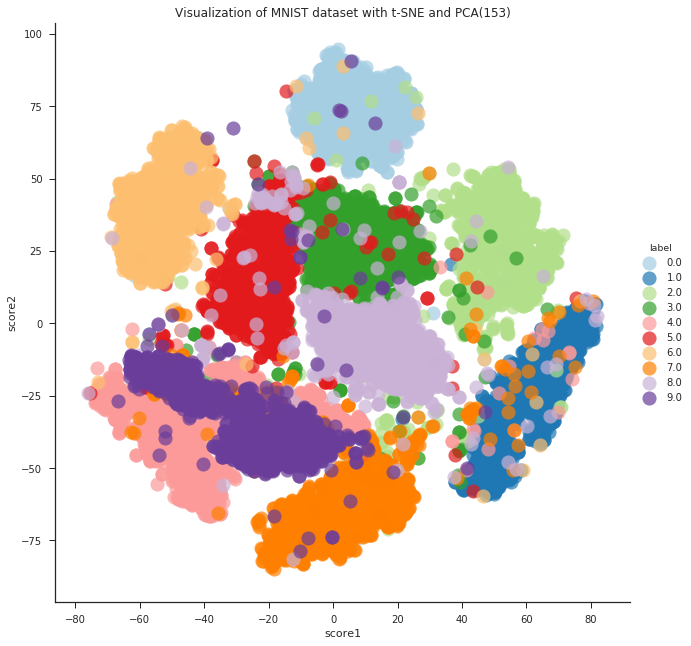

In [58]:
df = pd.DataFrame({'score1':X_tsne[:,0],'score2':X_tsne[:,1],'label':y[:]})
sns.set_style('ticks')
sns.lmplot(
    x = 'score1'
    ,y = 'score2'
    ,hue = 'label'
    ,data = df
    ,fit_reg = False
    ,legend = True
    ,size = 9
    ,scatter_kws = {'s':200, 'alpha':0.7}
    ,palette = sns.color_palette("Paired",10)
)
plt.title('Visualization of MNIST dataset with t-SNE and PCA(153)')

3D visualization:

In [60]:
X_tsne3 = TSNE(verbose = 1, n_components = 3).fit_transform(X) # careful, this may take a long time to run!
X_tsne3.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.365s...
[t-SNE] Computed neighbors for 10000 samples in 108.358s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 405.451041
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.842903
[t-SNE] KL divergence after 1000 iterations: 1.583533


(10000, 3)

Convert 3D data to Pandas DataFrame: 

In [61]:
df = pd.DataFrame({'score1':X_tsne3[:,0],'score2':X_tsne3[:,1],'score3':X_tsne3[:,2],'label':y[:]})

Prepare color map, colors, and patches for the legend:

In [127]:
cmap = sns.color_palette("Paired",10)
clrs = [cmap[int(l)] for l in df.label]
patches = [mpatches.Patch(color=cmap[ix], label=str(ix)) for ix in range(10)]

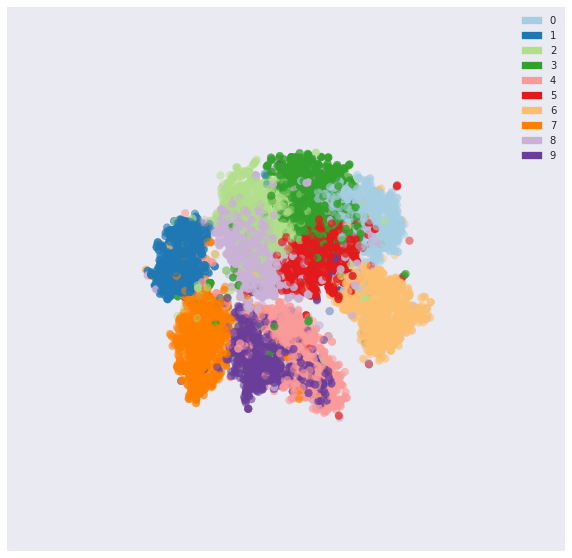

In [140]:
max_points = 10000

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df.loc[:max_points,'score1']
    , df.loc[:max_points,'score2']
    , df.loc[:max_points,'score3']
    , c=clrs[:max_points], s=60)

ax.view_init(15, 185)
ax.axis('Off')
ax.legend(handles=patches)
plt.show()

Rotate the data and store it as a movie: 

In [141]:
angle = 0.0

def update(frame):
    global ax
    global angle
    angle += 1.0
    
    ax.clear()
    ax.scatter(
        df.loc[:max_points,'score1']
        , df.loc[:max_points,'score2']
        , df.loc[:max_points,'score3']
        , c=clrs[:max_points], s=60)
    ax.axis('Off')
    ax.legend(handles=patches)
    ax.view_init(15, angle)
    
anim = FuncAnimation(fig, update, interval = 10, frames = 36*10)
#anim.save('mnist.mp4',fps = 30)

In [142]:
video = io.open('mnist.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))